# **Modelling phase**


## **Objectives**
1. **Primary Objective**: Model the tenure as survival time using survival analysis techniques.
2. **Secondary Objective**: Predict customer churn using classification models.
3. **Comparison Objective**: Evaluate model performance on three different datasets:
   - Dataset 1: Preprocessed data with feature engineering.
   - Dataset 2: Dataset 1 with PCA applied.
   - Dataset 3: PCA applied directly to the original data.

## **Dataset Preparation**
1. **Data Splitting**: Split the data into training and testing sets.
2. **Scaling**: Apply StandardScaler to scale the data.
3. **PCA Application**:
   - Apply PCA on Dataset 2 and Dataset 3.
   - Determine the number of components based on explained variance.

## **Modeling Approach**

### **1. Survival Analysis**
- **Model Selection**: Start with the Cox Proportional Hazards model. If needed, consider alternatives like the Accelerated Failure Time (AFT) model.
- **Modeling**: Fit the Cox model on all three datasets. Validate the proportional hazards assumption and compare performance using metrics like the Concordance Index.
- **Cross-Validation**: Ensure the model’s stability with cross-validation.

### **2. Churn Classification**
- **Model Selection**: Start with logistic regression and move on to complex models like Random Forest, Gradient Boosting, or XGBoost.
- **Evaluation**: Compare models across different datasets using metrics like AUC-ROC, Precision-Recall, and F1-score.
- **Cross-Validation**: Use cross-validation to validate model performance.

## **Model Interpretation and Explainability**
1. **Survival Analysis**: Interpret coefficients and generate survival curves.
2. **Classification Models**: Use SHAP or LIME for feature importance and interpretation.

## **Comparison and Results**
1. **Performance Metrics**: Summarize and compare model performance across datasets.
2. **Discussion**: Analyze the impact of feature engineering vs. PCA and discuss trade-offs.

## **Conclusion**
1. **Final Recommendations**: Recommend the best model based on performance and interpretability.
2. **Further Steps**: Suggest refinements or additional analyses, such as hyperparameter tuning or exploring other techniques.





In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [17]:
# Importing data
og_df = pd.read_csv('data/cleaned_data.csv')
f_df = pd.read_csv('data/Fancy_data.csv')

In [18]:
# Lets encode the original dataset
og_df.columns

Index(['Unnamed: 0', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
# Dropping the useless column
og_df.drop('Unnamed: 0',inplace=True,axis=1)

In [26]:
# Looking at the data
og_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
# Extracting the categorical data
categorical_columns = og_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [30]:
# Encoding the categorical columns
og_df = pd.get_dummies(og_df, columns=categorical_columns,drop_first=True)

## Working on the OG Dataset

Here we take on the original cleaned dataset and perform the following on it:
- Scale the data
- Apply PCA on it
- Interpret the PCs using scree plot, variance ratio plot and loading matrix

In [47]:
# Getting the object
scaler = StandardScaler()
pca = PCA(n_components='mle')

In [50]:
# Extracting the design and the target columns
y = og_df['Churn_Yes']
x = og_df.drop('Churn_Yes',axis=1)

In [51]:
# Scaling the data and finding the PCs
x_scaled = scaler.fit_transform(x)
x_pca = pca.fit(x_scaled)

In [52]:
# Looking at the number of components chosen
pca.n_components_

23

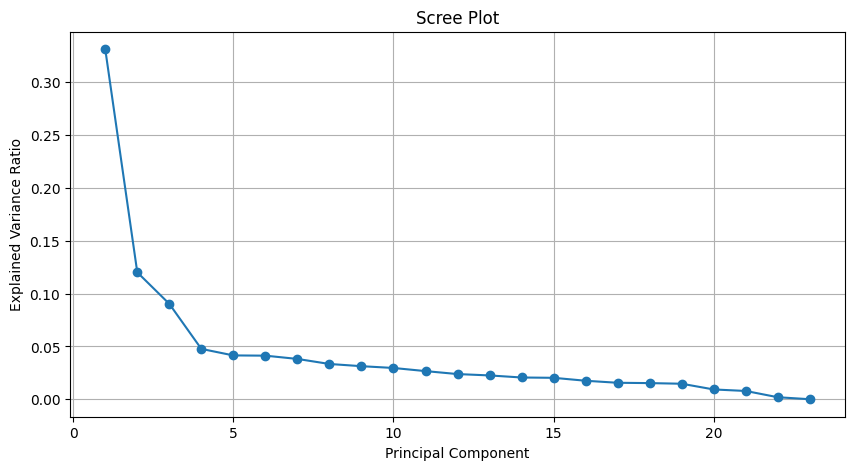

In [53]:
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


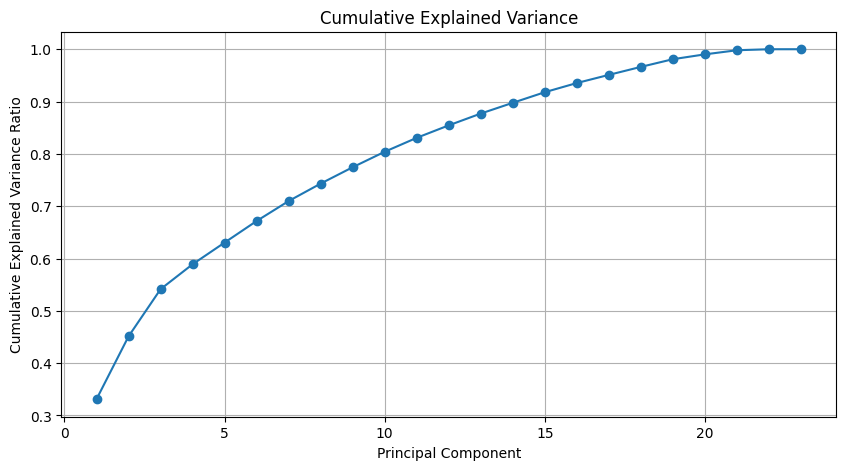

In [54]:
# Cumulative explained variance plot
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

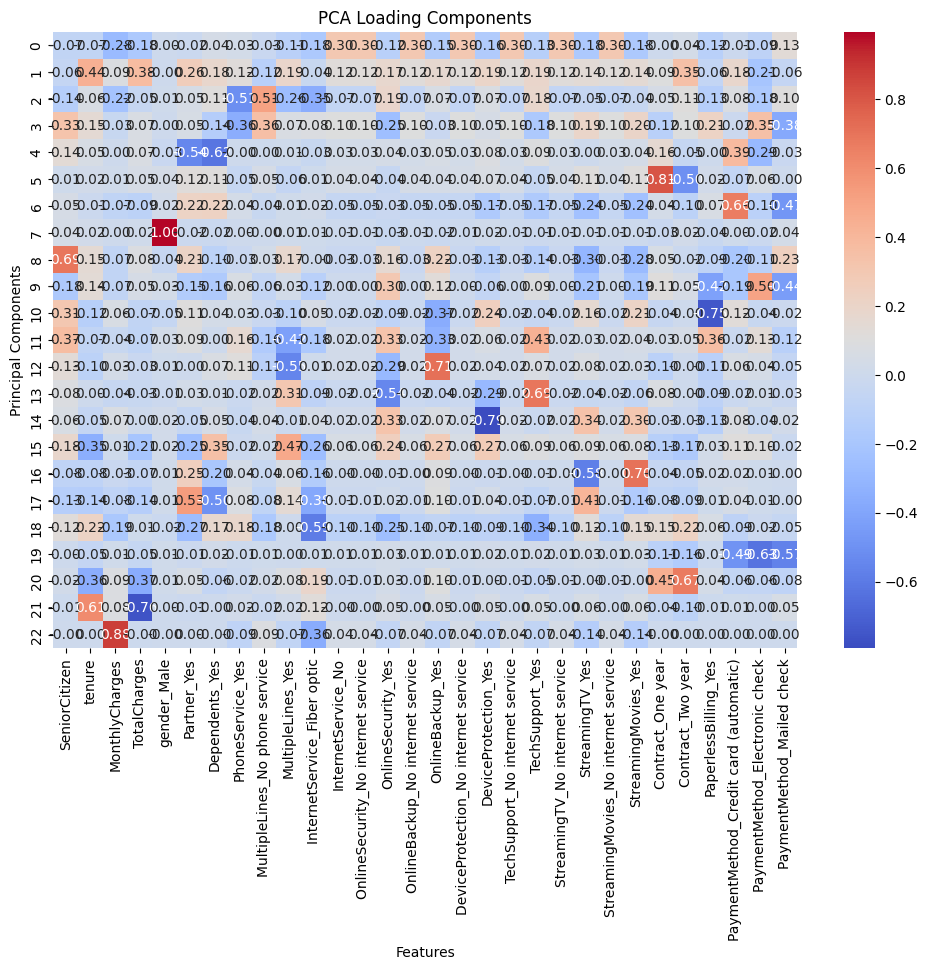

In [56]:
loading_matrix = pd.DataFrame(pca.components_, columns=x.columns)

plt.figure(figsize=(12, 8))
sns.heatmap(loading_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('PCA Loading Components')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()


In [57]:
# Identify the features with the highest variance for the first principal component
top_features_PC1 = loading_matrix.iloc[0].sort_values(ascending=False).head(5)
print("Top features contributing to the first principal component:")
print(top_features_PC1)


Top features contributing to the first principal component:
InternetService_No                      0.3027
DeviceProtection_No internet service    0.3027
TechSupport_No internet service         0.3027
OnlineBackup_No internet service        0.3027
StreamingTV_No internet service         0.3027
Name: 0, dtype: float64


## Working on the Fancy Dataset

Here we take on the engineered dataset and perform the following on it:
- Scale the data.
- Apply PCA on the scaled data.
- Interpret the PCs using scree plot, variance ratio plot and loading matrix.

In [72]:
f_df.shape

(7010, 13)

In [65]:
# Extracting response and design matrix
y = f_df['Churn']
x = f_df.drop(['Churn','TotalServices'],axis=1)

In [66]:
# Getting the scale and pca objects
scale = StandardScaler()
pca = PCA(n_components='mle')

In [68]:
# scaling the data and applying the pca on it
x_scaled = scale.fit_transform(x)
x_pca = pca.fit(x_scaled)

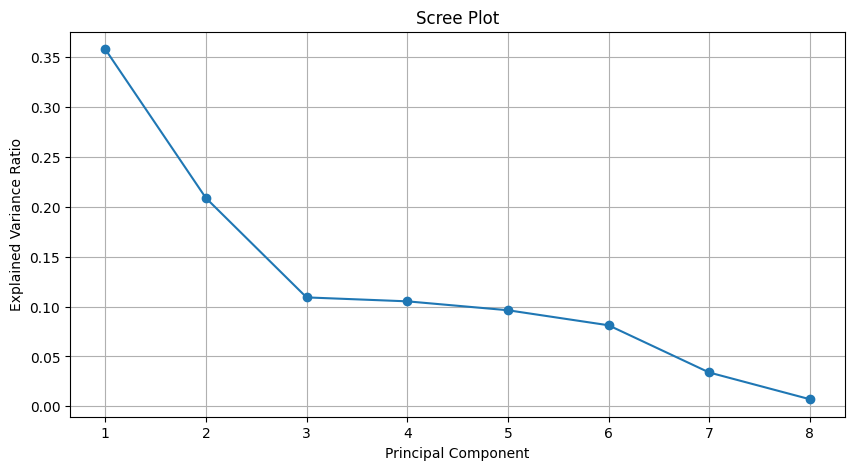

<Figure size 640x480 with 0 Axes>

In [84]:
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

plt.savefig('vizes/scree_plot.jpg',facecolor='black', transparent=False)

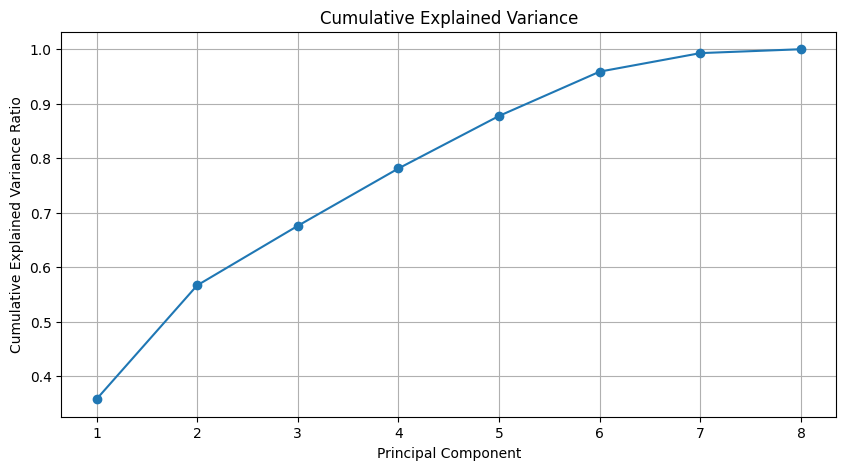

<Figure size 640x480 with 0 Axes>

In [79]:
# Cumulative explained variance plot
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

plt.savefig('vizes/CEV.jpg')

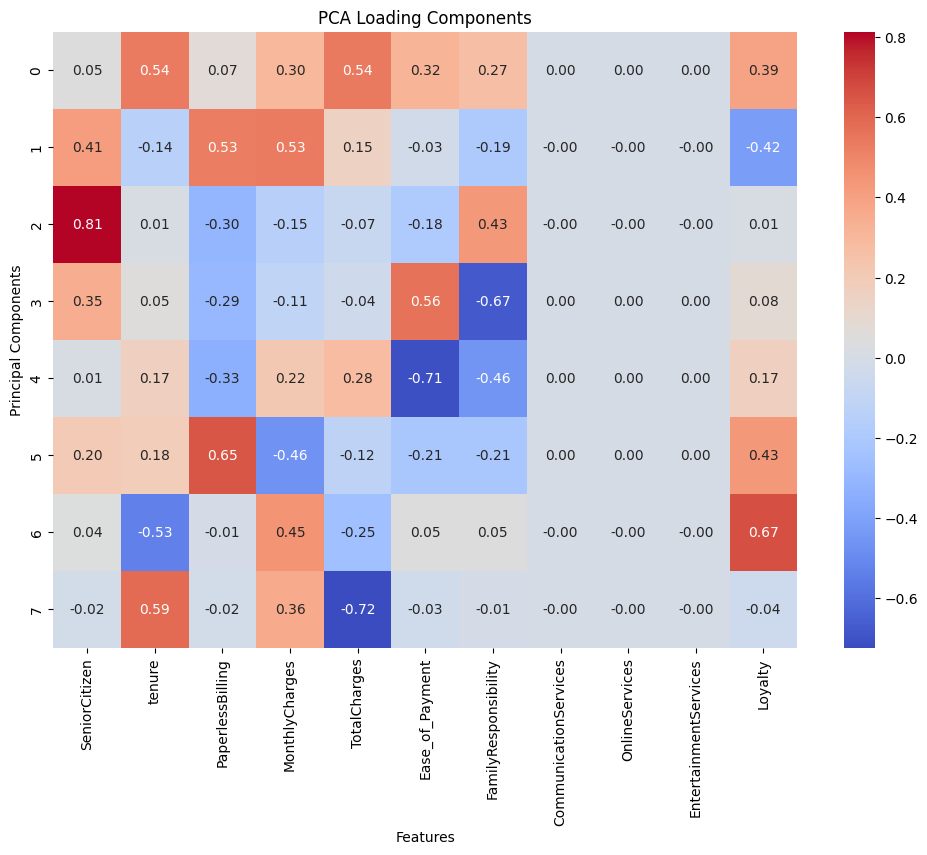

<Figure size 640x480 with 0 Axes>

In [80]:
loading_matrix = pd.DataFrame(pca.components_, columns=x.columns)

plt.figure(figsize=(12, 8))
sns.heatmap(loading_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('PCA Loading Components')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

plt.savefig('vizes/loading_heatmap.jpg')